In [193]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [194]:
# Read data from file
data = pd.read_csv("data/xdata.txt", sep=" ", header=None)

In [195]:
# Count number of rows
n = len(data)
print('We have', n, 'rows')

We have 1000 rows


In [196]:
# Calculate sample averate
mu = (1 / n * np.sum(data))[0]
print('Sample average is', mu)

Sample average is 2.5384902240000002


In [197]:
# Calculate function value for the given lambda (l)
def calculate_value(l):
    p1 = n * np.log(l)
    p2 = np.sum(np.log(2 * np.pi * np.power(data, 3)))
    p3 = l / mu ** 2
    p4 = np.sum(data) - 2 * n * mu + mu * mu * np.sum(1 / data)
    value = p1 - p2 - p3 * p4
    return value / 2

In [198]:
# Calculate first derivative value for the given lambda (l)
def calculate_derivative(l):
    p1 = n / l
    p2 = -n + mu * np.sum(1 / data)
    value = p1 - p2 / mu
    return value / 2

In [199]:
# Calculate data to draw the plot of the function with lambda as variable
x = np.linspace(1, 2, 1000)
result = []
max_y = -100000
max_l = 0
for idx, j in np.ndenumerate(x):
    y = calculate_value(j)[0]
    if y > max_y:
        max_y = y
        max_l = j
    result.append(y)

print("Maximum of the maximum of likelihood function is", round(max_y, 3), "and it is attained for lambda",
      round(max_l, 3))

Maximum of the maximum of likelihood function is -1811.323 and it is attained for lambda 1.477


In [200]:
# Calculate data to draw the plot of the first derivative with lambda as variable
x_d = np.linspace(1, 2, 1000)
result_d = []
for idx, j in np.ndenumerate(x_d):
    result_d.append(calculate_derivative(j)[0])

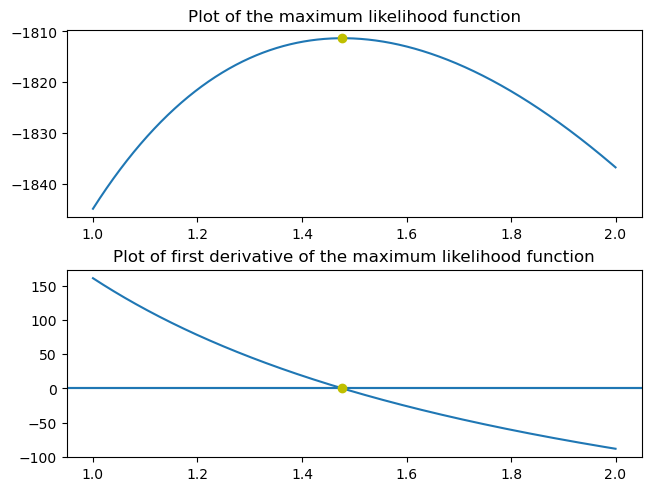

In [201]:
# Draw plots
fig, axs = plt.subplots(2, constrained_layout=True)

# First plot
axs[0].set_title("Plot of the maximum likelihood function")
axs[0].plot(x, result)
axs[0].plot(1.477, -1811.323, 'yo')

# Second plot
axs[1].set_title("Plot of first derivative of the maximum likelihood function")
axs[1].plot(x_d, result_d)
axs[1].axline((1, 0), (2, 0))
axs[1].axline((1, 0), (2, 0))
axs[1].plot(1.477, 0, 'yo')